In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282
25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10n"}],"base":"stations","main":{"temp":35.55,"feels_like":29.14,"temp_min":33.03,"temp_max":37.99,"pressure":1012,"humidity":87},"visibility":10000,"wind":{"speed":8.05,"deg":110},"rain":{"1h":2.37},"clouds":{"all":100},"dt":1674167717,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1674130123,"sunset":1674164441},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City weather found.")
else:
    print(f"City weather not found.")

City weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 35.55,
  'feels_like': 29.14,
  'temp_min': 33.03,
  'temp_max': 37.99,
  'pressure': 1012,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 110},
 'rain': {'1h': 2.37},
 'clouds': {'all': 100},
 'dt': 1674167717,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1674130123,
  'sunset': 1674164441},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['sys']['country']

'US'

In [17]:
boston_data['dt']

1674167717

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 37.99 87 100 8.05


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2023-01-19 22:35:17'

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1674167874.714703

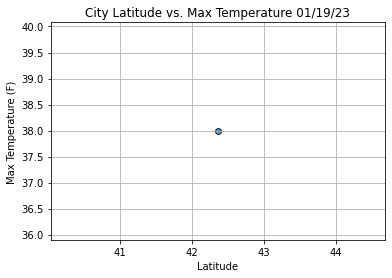

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lat,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()